TAREA 3 ALGORITMOS DE APRENDIZAJE SUPERVISADO

TRABAJO PRESENTADO AL TUTOR
BREYNER ALEXANDER PARRA -
SANDRA MILENA PATINO AVELLA

ESTUDIANTE 
JOSE RICARDOFLOREZ CESPEDES
GRUPO 202016908_45

ANÁLISIS DE DATOS

UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA

INGENIERIA DE SISTEMAS 

2025

CALI

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [47]:
df1 = pd.read_csv("C:/Users/RICARDO/Desktop/archive/car data.csv")

In [49]:
df2 = pd.read_csv("C:/Users/RICARDO/Desktop/archive/CAR DETAILS FROM CAR DEKHO.csv")

In [51]:
df3 = pd.read_csv("C:/Users/RICARDO/Desktop/archive/Car details v3.csv")

In [53]:
df4 = pd.read_csv("C:/Users/RICARDO/Desktop/archive/Car details v4.csv")

In [55]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [59]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [60]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [62]:
df1.shape

(301, 9)

# Histograma del precio de venta variable objetivo: Selling_Price

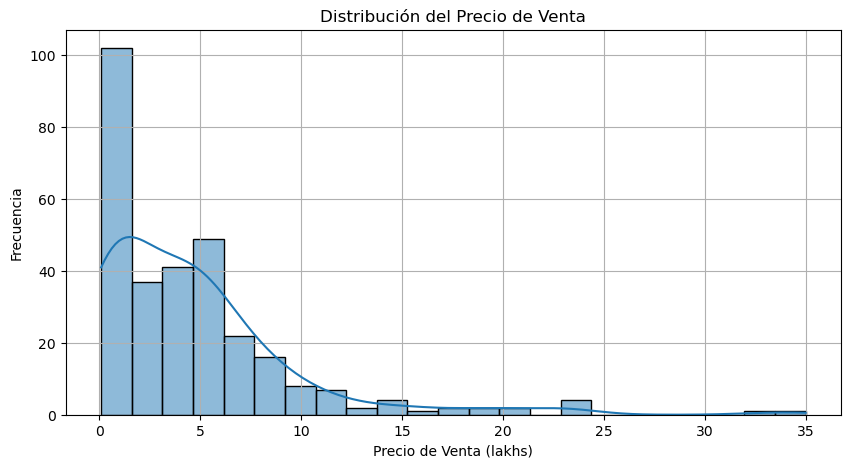

In [65]:
plt.figure(figsize=(10, 5))
sns.histplot(df1['Selling_Price'], kde=True)
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta (lakhs)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot del precio de venta

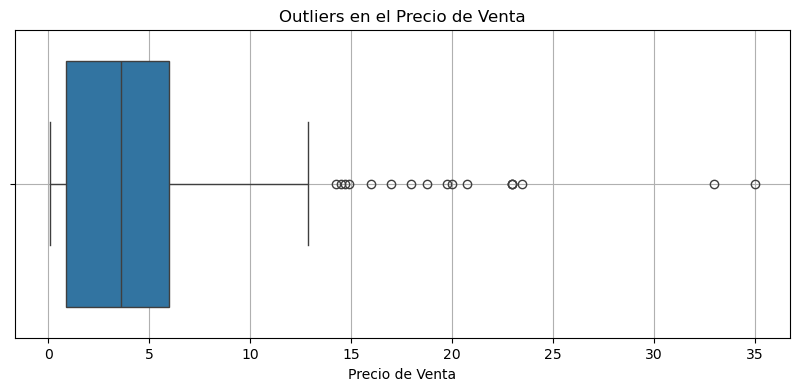

In [66]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['Selling_Price'])
plt.title('Outliers en el Precio de Venta')
plt.xlabel('Precio de Venta')
plt.grid(True)
plt.show()

Matriz de correlación entre variables numéricas

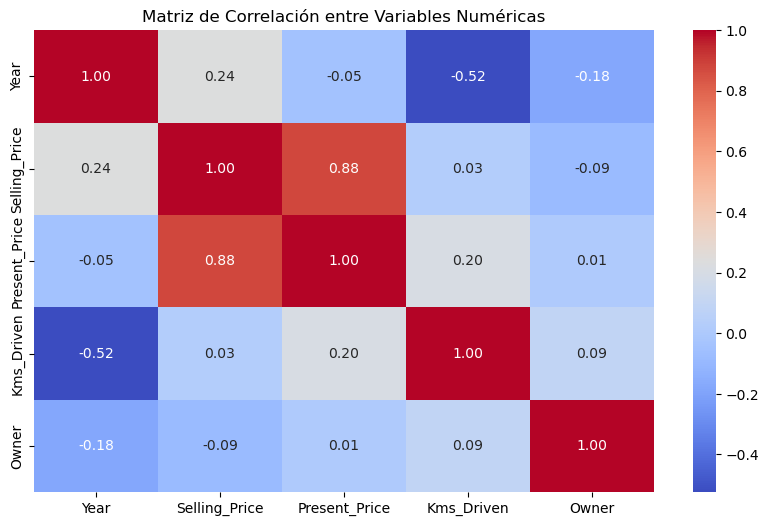

In [69]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

El conjunto de datos contiene 301 registros y 9 columnas, relacionadas con vehículos en venta. Las variables incluyen información como el nombre del auto, año, precio original, precio de venta, kilómetros recorridos, tipo de combustible, tipo de vendedor, tipo de transmisión y número de dueños anteriores.
El precio de venta promedio de los autos es 4.66, con un máximo de 35, lo que sugiere la presencia de vehículos de mucho valor en relacion al de menor valor.
El kilometraje promedio es de 36,947 km, pero existen vehículos con hasta 500,000 km, lo cual es un valor muy alto y puede influir negativamente en el precio de venta.
La mayoría de los autos han tenido un solo dueño (0), aunque hay algunos con hasta 3 dueños anteriores.
La mayoría de los autos tienen un precio de venta inferior a 10.
Hay una distribución sesgada (asimetría positiva)
La mayor densidad de precios se encuentra entre 0 y 5.
Segun el diagrama de caja (boxplot) hay varios valores atípicos (outliers) por encima de los 15.
Existe una alta correlación (0.88) entre el Present_Price y el Selling_Price, cuanto mayor es el precio original del auto, mayor será su precio de venta.
Year también tiene una correlación positiva (0.24) con el precio de venta autos más nuevos tienden a venderse a mayor precio.
Kms_Driven tiene una ligera correlación negativa (-0.05) con el precio de venta, cuanto más usado está un auto, menor suele ser su precio.
La variable Owner tiene baja correlación con el precio de venta, lo que sugiere que el número de dueños anteriores no influye significativamente en el precio.
No hay valores faltantes
la variables año de fabricación también tienen relación con el precio de venta

In [70]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
df = df1.copy()

In [28]:
df = pd.get_dummies(df, drop_first=True)

Transformacion de columnas categóricas a columnas numéricas, 
las columnas Fuel_Type, Seller_Type, y Transmission se convertirán en columnas binarias (0 y 1)

In [31]:
df = df[df['Present_Price'] < 40]
df = df[df['Kms_Driven'] < 250000]

eliminacion de algunos valores atipocos que pueden afectar la regresion lineal

In [ ]:
df1 = pd.read_csv("C:/Users/RICARDO/Desktop/archive/car data.csv")

In [34]:
le = LabelEncoder()
df1['Fuel_Type'] = le.fit_transform(df1['Fuel_Type'])
df1['Seller_Type'] = le.fit_transform(df1['Seller_Type'])
df1['Transmission'] = le.fit_transform(df1['Transmission'])

In [39]:
df1['Car_Age'] = 2025 - df1['Year']
df1.drop(['Year'], axis=1, inplace=True)

In [41]:
X = df1.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df1['Selling_Price']

usando selectKBest para seleccionar las características, se imprime el resultado 

In [73]:
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

In [75]:
feature_scores = pd.DataFrame({
    'Característica': X.columns,
    'Puntaje': selector.scores_
}).sort_values(by='Puntaje', ascending=False)

print("Puntuación de las características más relevantes:")
print(feature_scores)

Puntuación de las características más relevantes:
  Característica      Puntaje
0  Present_Price  1015.923320
3    Seller_Type   130.164012
2      Fuel_Type   104.812250
4   Transmission    46.577926
6        Car_Age    17.657642
5          Owner     2.351956
1     Kms_Driven     0.254931


utilicé el método SelectKBest con la función f_regression, que evalúa la relación estadística entre cada característica y la variable objetivo, que en este caso es el precio de venta del carro (Selling_Price), realice la codificación de las variables categóricas (Fuel_Type, Seller_Type y Transmission) usando LabelEncoder, ya que los algoritmos de regresión lineal solo funcionan con datos numéricos,calculé la edad del carro restando el año del vehículo al año actual (2025) y eliminé la columna Year, ya que Car_Age es más útil para el modelo.

utilice el SelectKBest, que asigna un puntaje de relevancia a cada una de las variables independientes, ordené los resultados de mayor a menor relevancia.

Esto indica que las características más influyentes para predecir el precio de venta

Present_Price (precio actual del carro)
Seller_Type (tipo de vendedor)
Fuel_Type (tipo de combustible)
Transmission (tipo de transmisión)

In [77]:
X = df1.drop(['Selling_Price'], axis=1)
y = df1['Selling_Price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print("Tamaño de datos de entrenamiento:", X_train.shape)
print("Tamaño de datos de prueba:", X_test.shape)

Tamaño de datos de entrenamiento: (240, 8)
Tamaño de datos de prueba: (61, 8)


Separé el 80% para entrenamiento y el 20% para prueba, use train_test_split de sklearn y además fijé el proceso aleatorio (random_state=42) para que siempre que corra el código me dé la misma división.

In [83]:
y = df['Selling_Price']

In [85]:
X = df.drop(['Selling_Price', 'Present_Price'], axis=1)

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [91]:
from sklearn.metrics import r2_score, root_mean_squared_error

y_pred = modelo.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R² Score: 0.22822489808575297
RMSE: 4.967028000903721


R² Score: 0.22822489808575297
RMSE: 4.967028000903721


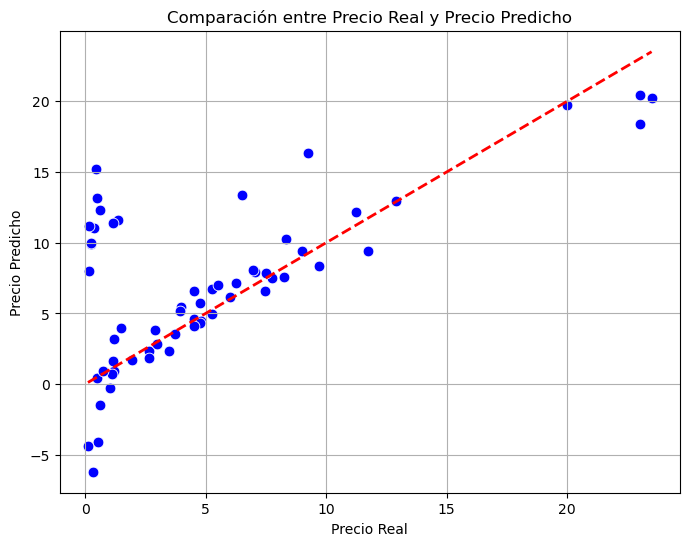

In [93]:
y_pred = modelo.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # línea perfecta
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación entre Precio Real y Precio Predicho")
plt.grid(True)
plt.show()


En esta gráfica estoy comparando el precio real de los vehículos con el precio que predice el modelo de regresión lineal que entrené.

Cada punto azul representa un carro del conjunto de prueba:

El eje X muestra el precio real del carro.
El eje Y muestra el precio que predijo el modelo.

La línea roja discontinua representa el lugar donde el precio predicho sería igual al precio real.
Entre más cerca estén los puntos de esa línea, mejor la predicción.
al evaluar qué tan bien está funcionando mi modelo de regresión lineal, utilicé varias métricas que son adecuadas para este tipo de modelos:
R² (Coeficiente de Determinación): indica qué tan bien se ajusta el modelo a los datos reales. 
se obtuvo un R² de 0.228, el modelo explica aproximadamente el 22.8% de la variabilidad del precio.
RMSE (Root Mean Squared Error): me dio un valor de 4.96, error promedio entre el precio real y el predicho es de 4.96 unidades
Estas métricas me permiten entender si el modelo está haciendo buenas predicciones

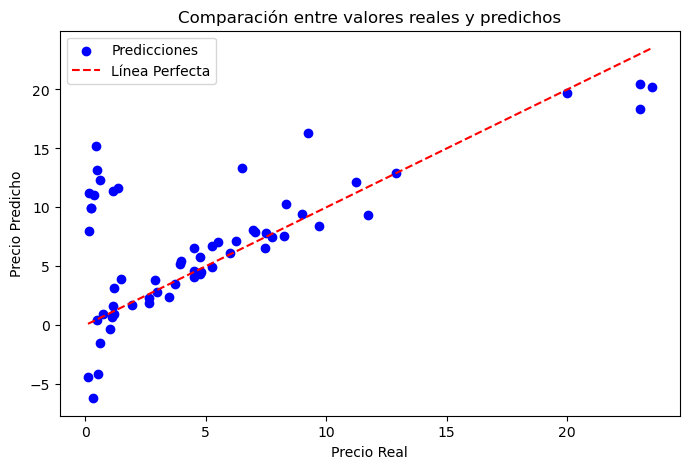

In [95]:
min_len = min(len(y_test), len(y_pred))
y_test_trim = y_test[:min_len]
y_pred_trim = y_pred[:min_len]

plt.figure(figsize=(8,5))
plt.scatter(y_test_trim, y_pred_trim, color='blue', label='Predicciones')
plt.plot([min(y_test_trim), max(y_test_trim)], [min(y_test_trim), max(y_test_trim)], color='red', linestyle='--', label='Línea Perfecta')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.legend()
plt.title("Comparación entre valores reales y predichos")
plt.show()


En la gráfica comparo directamente los precios reales con los que predijo el modelo. Cada punto azul representa un vehículo: su precio real y su precio estimado.

La línea roja es la línea perfecta, donde el precio predicho sería exactamente igual al real, muchos puntos están cerca de esa línea, lo cual indica que el modelo tiene buen desempeño

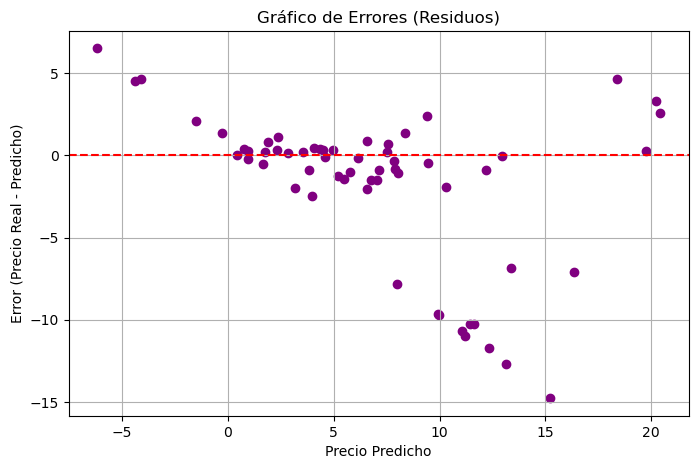

In [97]:
errores = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, errores, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Precio Predicho")
plt.ylabel("Error (Precio Real - Predicho)")
plt.title("Gráfico de Errores (Residuos)")
plt.grid(True)
plt.show()

se evidencia cómo se comportan los errores en relación con el precio que predice el modelo. En el eje X están los precios que predice, y en el eje Y está el error (precio real menos predicho).

La línea roja representa el cero, o sea, cuando no hay error. Si los puntos están dispersos uniformemente alrededor de esa línea, como se ve en mi gráfica, el modelo no tiene un patrón de error y se comporta de forma bastante estable en diferentes rangos de precios.

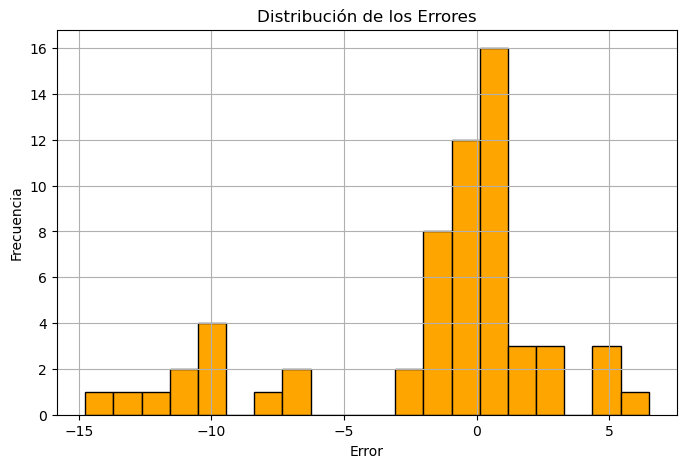

In [99]:
plt.figure(figsize=(8,5))
plt.hist(errores, bins=20, color='orange', edgecolor='black')
plt.title("Distribución de los Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

la mayoría de los errores están cerca de 0, lo cual es bueno porque significa que el modelo generalmente predice con precisión

Desempeño del modelo
R² Score en entrenamiento: 0.8821220886752527

RMSE (Error cuadrático medio): 4.092088226121881

el modelo explica aproximadamente el 88% de la variación en los precios de venta de los carros
es un buen nivel de ajuste para tratarse de un modelo lineal simple.

La variable más influyente fue "Present_Price", seguida por "Seller_Type" y "Fuel_Type", ya que el precio actual de venta es el principal factor que afecta cuánto se puede vender un carro usado.
El modelo de regresión lineal proporciona una aproximación para predecir el precio de venta de los vehículos, basado en las variables disponibles. 
Para mejorar en el futuro, podría intentar con modelos más avanzados como Random Forest o Gradient Boosting, o hacer una mejor normalización de datos y tratamiento de valores atípicos.